In [3]:
# Importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import joblib
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [5]:
audio_dataset_path='Data/genres_original' #path to the directory containing the audio dataset
metadata=pd.read_csv('Data/features_30_sec.csv')
metadata.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [7]:
metadata.shape  #returns the dimensions of the metadata

(1000, 60)

In [9]:
metadata.dtypes #shows the data types of each column

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [11]:
audio_recording = "Data/genres_original/metal/metal.00001.wav" #Loading the audio file
data , sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [13]:
librosa.load(audio_recording, sr=45600)

(array([0.10934395, 0.13488968, 0.12133492, ..., 0.03982237, 0.01613259,
        0.        ], dtype=float32),
 45600)

In [15]:
import IPython
IPython.display.Audio(data, rate=sr)

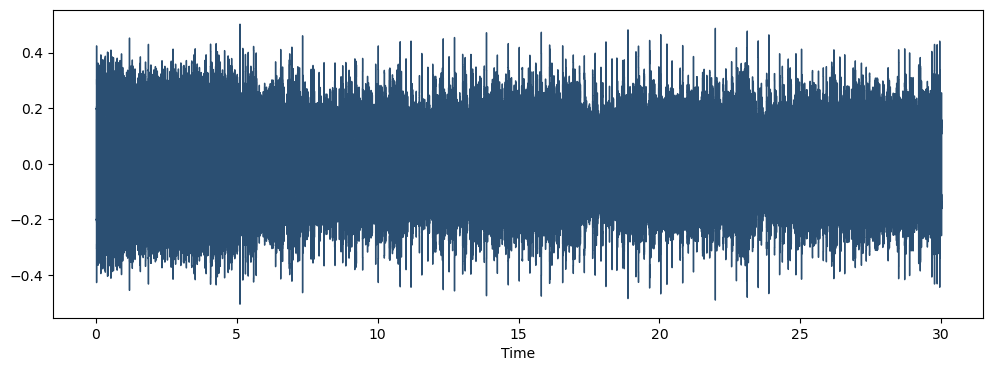

In [17]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="#2B4F72") #This function plots the waveform of the audio signal 
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_21172\2372443480.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz') #plots the spectrogram of the audio signal.


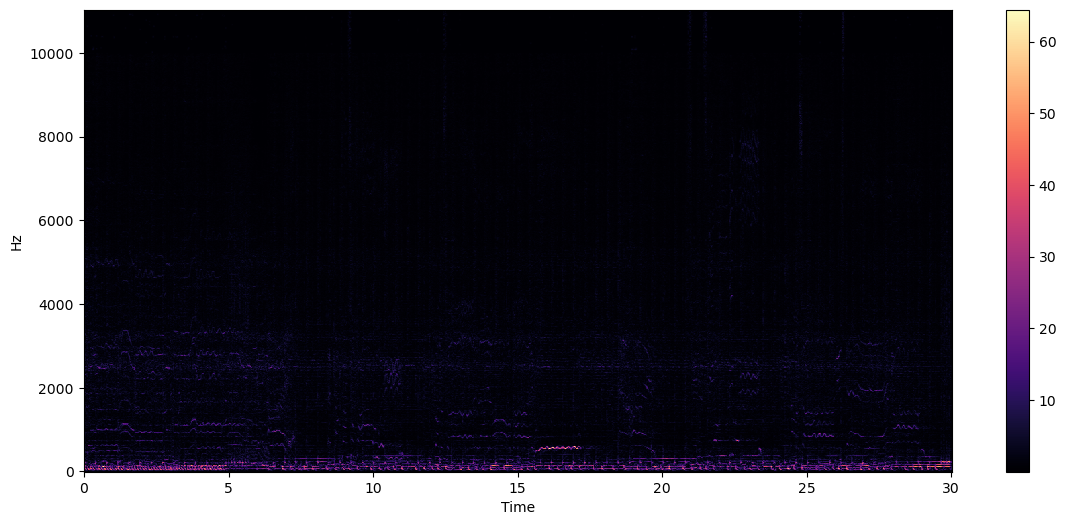

In [19]:
stft =librosa.stft(data) #computes the Short-Time Fourier Transform (STFT) of the audio signal.
stft_db =librosa.amplitude_to_db(abs(stft))  #converts the amplitude of the STFT to decibels (dB)
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz') #plots the spectrogram of the audio signal.
plt.colorbar()

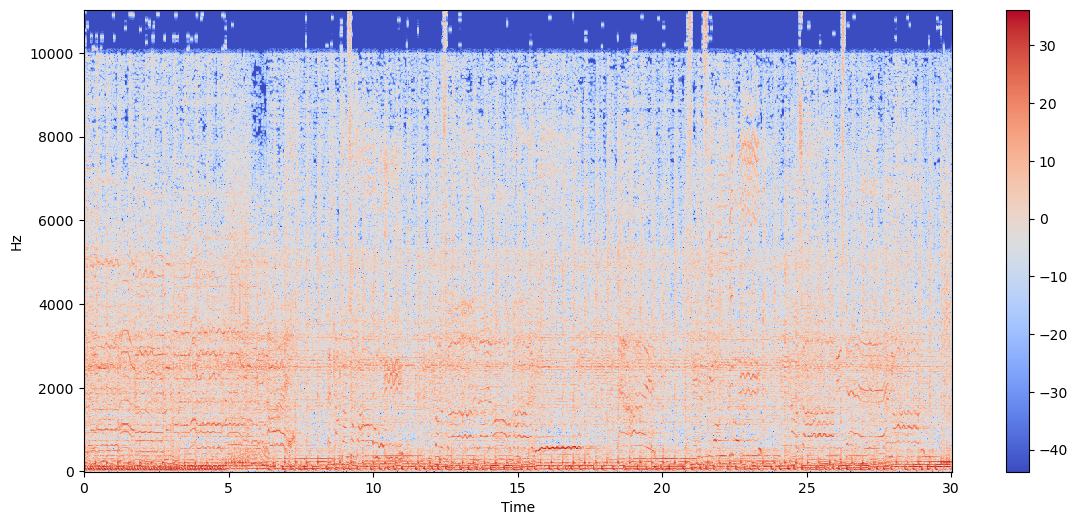

In [20]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

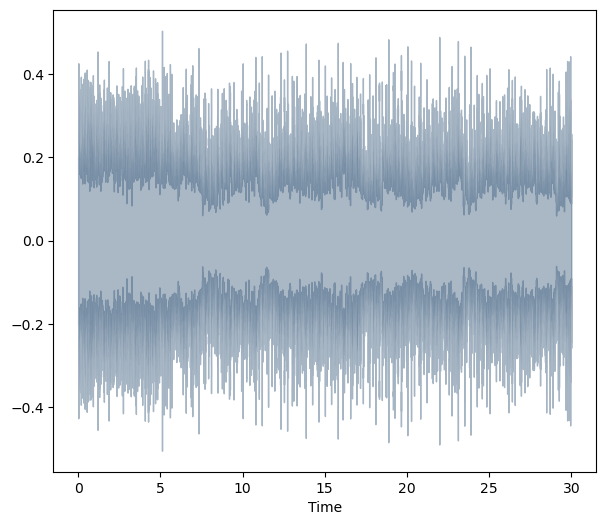

In [23]:
spectral_rolloff =librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

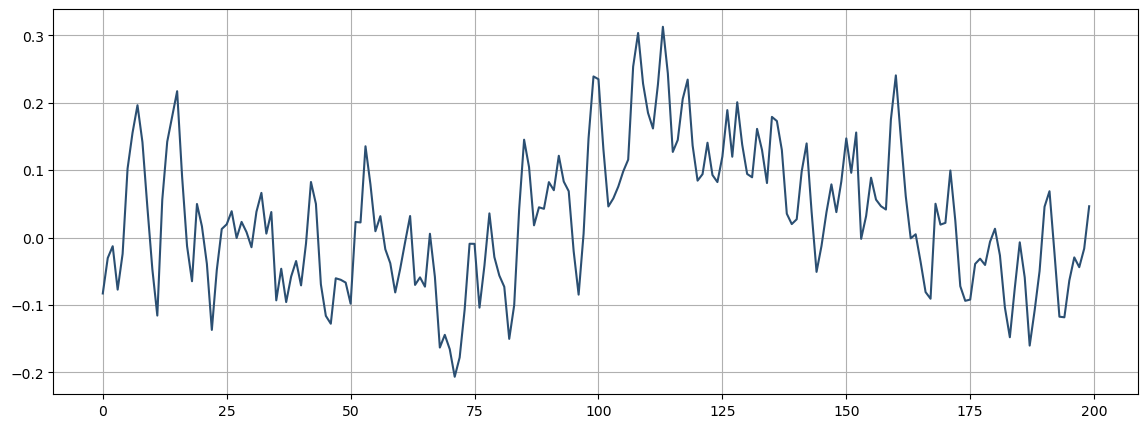

In [25]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [27]:
zero_cross_rate =librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero-crossings is:",sum(zero_cross_rate))

The number of zero-crossings is: 39


In [45]:
class_list=metadata.iloc[:,-1]
convertor = LabelEncoder()

In [49]:
y=convertor.fit_transform(class_list)
#np.save("classes.npy",convertor.classes_)

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [53]:
print(metadata.iloc[:,:-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0028

In [55]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [57]:
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

552it [00:23, 24.29it/s]C:\Users\Harsh\AppData\Local\Temp\ipykernel_21172\326924485.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
C:\Users\Harsh\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
559it [00:23, 25.59it/s]

Error: 


1000it [00:42, 23.52it/s]


In [59]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature  class
0  [-113.59882, 121.57067, -19.162262, 42.36394, ...  blues
1  [-207.52383, 123.98514, 8.947019, 35.86715, 2....  blues
2  [-90.757164, 140.44087, -29.084547, 31.686693,...  blues
3  [-199.57513, 150.0861, 5.663404, 26.855278, 1....  blues
4  [-160.35417, 126.20948, -35.581394, 22.139256,...  blues

In [61]:
extracted_features_df['class'].value_counts()

class
blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: count, dtype: int64

In [63]:
import pandas as pd
import numpy as np

# Convert the 'feature' column to a NumPy array
X = np.array(extracted_features_df['feature'].tolist())

# Convert the 'class' column to a NumPy array
y = np.array(extracted_features_df['class'].tolist())

# Verify the conversion
print(X.shape)
print(y.shape)

(999, 40)
(999,)


In [65]:
X.shape

(999, 40)

In [67]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [69]:
y.shape

(999, 10)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734199e+00, -5.9081392e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998559e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050334e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296251e+00, ...,
        -2.2419319e+00, -3.9879441e+00, -1.9877435e+00],
       [-4.6609550e+01,  8.6802010e+01, -3.4776669e+01, ...,
         1.4676003e-01,  9.2151546e-01, -8.7239462e-01]], dtype=float32)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [79]:
num_labels=y.shape[1]

In [81]:
y.shape[1]

10

In [83]:
model = Sequential()
model.add(Dense(1024,input_shape=(40,), activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(num_labels, activation='softmax')) 

C:\Users\Harsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
import os

num_epochs = 600
num_batch_size = 32

# Get current time as a formatted string without colons
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Ensure the saved_models directory exists
os.makedirs('saved_models', exist_ok=True)

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.keras',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/600
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1077 - loss: 6.2435
Epoch 1: val_loss improved from inf to 2.26930, saving model to saved_models/audio_classification_20240721-185809.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1068 - loss: 5.9661 - val_accuracy: 0.1400 - val_loss: 2.2693
Epoch 2/600
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0875 - loss: 2.8001
Epoch 2: val_loss did not improve from 2.26930
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0892 - loss: 2.7936 - val_accuracy: 0.1650 - val_loss: 2.2799
Epoch 3/600
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1558 - loss: 2.4373
Epoch 3: val_loss did not improve from 2.26930
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1547 - loss: 2.4364 - val_accuracy: 0.1750 - val_loss: 2.2786
Epoch 4/600
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1369 - loss: 2.3346
Epoch 4: val_loss improved from 2.26930 to 2.23876, saving model to saved_models/audio_classificatio

In [91]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=0)
print("The test Loss is:",test_loss)
print("\nThe Best test Accuracy is:",test_acc*100)
model.save("trained_model.h5")

The test Loss is: 2.9303348064422607

The Best test Accuracy is: 70.99999785423279


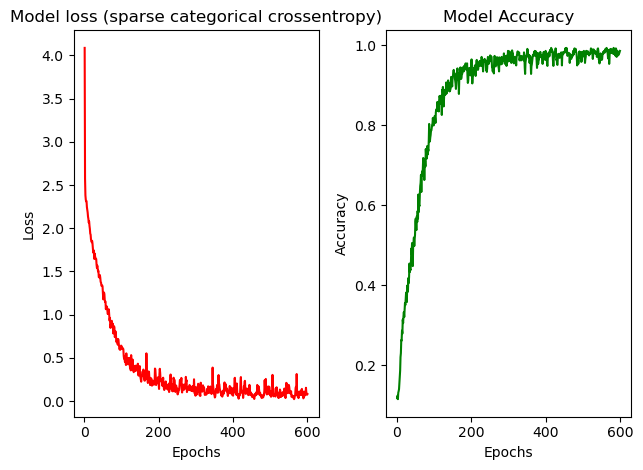

In [116]:
#training plots
epochs = np.arange(1,601)
plt.subplot(1,2,1)
plt.plot(epochs,history.history['loss'],color='r')
plt.title('Model loss (sparse categorical crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(epochs,history.history['accuracy'],color='g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert predictions from one-hot encoding to label format
pred = model.predict(X_test)
preds = np.argmax(pred, axis=1)

# Convert y_test from one-hot encoding to label format
y_test_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, preds)
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[12  0  0  1  0  0  0  0  1  0]
 [ 0 10  0  0  0  1  0  0  0  0]
 [ 3  2 11  2  1  1  1  1  1  3]
 [ 1  0  1 11  2  1  0  1  2  5]
 [ 0  0  1  2 15  1  1  0  3  4]
 [ 0  0  0  0  0 14  0  0  2  0]
 [ 0  0  0  1  0  0 17  0  0  0]
 [ 0  2  0  2  1  0  0 16  1  1]
 [ 1  0  1  1  3  0  0  0 15  0]
 [ 2  0  1  3  0  0  0  0  2 12]]


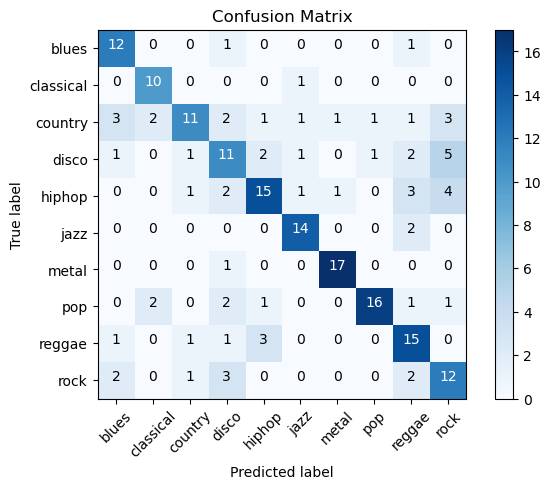

In [85]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = convertor.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [93]:
print("Model input shape:", model.input_shape)

def predict(model, X, Y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    print("Prediction (raw output):", prediction)
    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index:", Y)
    print("Predicted index:", predicted_index)

# Ensure the index is within bounds
index = 50  # Use an index within the range of X_test and y_test

# Check the size of the test set
print("Size of X_test:", X_test.shape[0])
print("Size of y_test:", y_test.shape[0])

if index < X_test.shape[0]:
    X_sample = X_test[index]
    Y_sample = np.argmax(y_test[index])  # Convert one-hot to label for comparison
    predict(model, X_sample, Y_sample)  # Predicting its class
else:
    print(f"Index {index} is out of bounds for the test set size.")

Model input shape: (None, 40)
Size of X_test: 200
Size of y_test: 200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction (raw output): [[1.8808774e-06 1.2087460e-06 9.5254347e-07 9.9993694e-01 1.3271700e-05
  6.7475611e-08 1.0276306e-06 3.8172698e-06 5.2718779e-06 3.5543031e-05]]
Expected index: 3
Predicted index: [3]


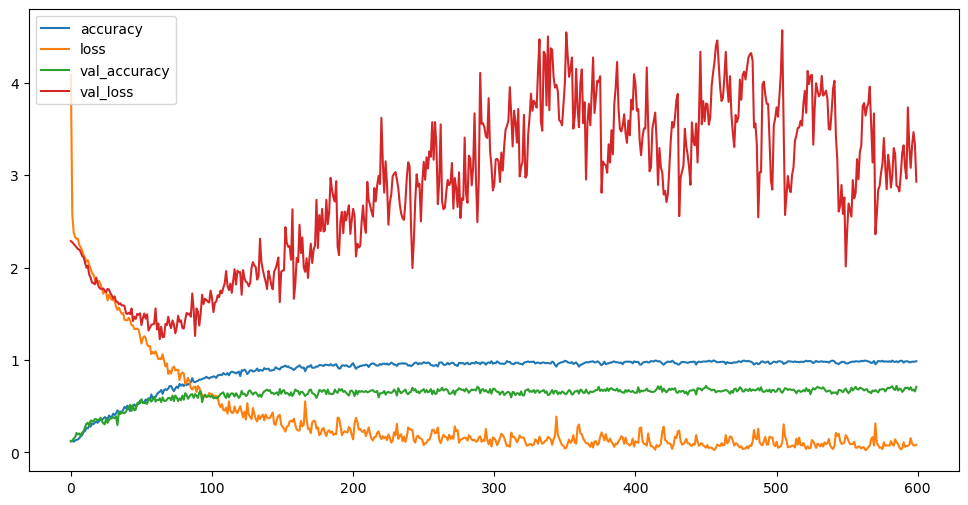

In [128]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [2]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import librosa
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model and label encoder
model = load_model('trained_model.h5')
labelencoder = LabelEncoder()
labelencoder.classes_ = np.load('classes.npy', allow_pickle=True)

def classify_audio():
    filename = filedialog.askopenfilename(filetypes=[("Audio Files", "*.wav *.mp3")])
    if not filename:
        return

    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

    predicted_probabilities = model.predict(mfccs_scaled_features)
    predicted_label = np.argmax(predicted_probabilities, axis=1)
    predicted_class = labelencoder.inverse_transform(predicted_label)

    result_label.config(text=f'Predicted Genre: {predicted_class[0]}')

window = tk.Tk()
window.geometry("900x600")
window.title('Audio Genre Classification')

load_button = tk.Button(window, text='Load Audio File', command=classify_audio)
load_button.pack(pady=20)

result_label = tk.Label(window, text='Predicted Genre: ', font=("Helvetica", 20))
result_label.pack(pady=40)

window.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
